In [32]:
import pymc as pm
import numpy as np

# Generate sample data for Wind Direction
with pm.Model() as direction_speed_model:
    # Define the circular transform for Wind Direction
    direction_transform = pm.distributions.transforms.circular

    # Define the prior distribution for Wind Direction
    direction = pm.Normal('direction', mu=0, sigma=.1, transform=direction_transform)

    # Generate the observed data for Wind Direction
    #direction_observed = pm.Normal('direction_observed', mu=direction, sigma=0.1, observed=np.random.randn(100))

    # Generate sample data for Wind Speed

    # Define the prior distribution for Wind Speed
    speed = pm.Normal('speed', mu=0, sigma=1)

    # Generate the observed data for Wind Speed
    #speed_observed = pm.Normal('speed_observed', mu=speed, sigma=0.1, observed=np.random.randn(100))


In [33]:
with direction_speed_model:
    samples = pm.sample(1000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [direction, speed]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.


In [34]:
direction_observed = samples.posterior.direction
speed_observed = samples.posterior.speed

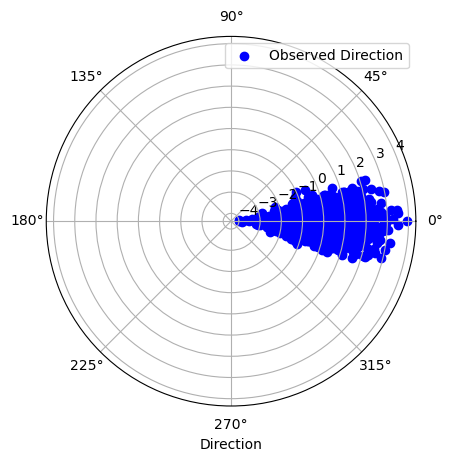

In [35]:
import matplotlib.pyplot as plt

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plot the observed direction, with speed magnitude as the radial coordinate
ax.scatter(direction_observed, speed_observed, c='blue', label='Observed Direction')

# Plot the observed speed
#ax.scatter(speed_observed, np.ones_like(speed_observed), c='red', label='Observed Speed')

# Set the labels and title
ax.set_xlabel('Direction')
ax.set_ylabel('')

# Add a legend
ax.legend()

# Show the plot
plt.show()


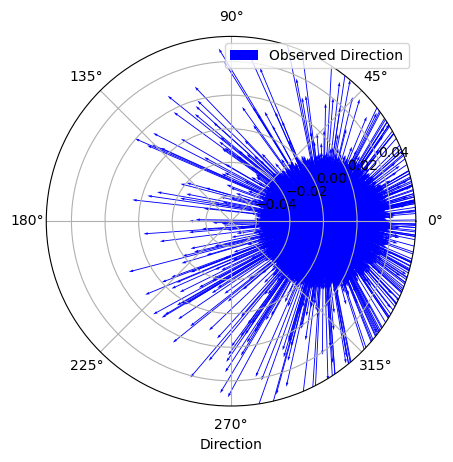

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# Convert polar coordinates to Cartesian coordinates
arrow_x = -speed_observed * np.sin(direction_observed)
arrow_y = -speed_observed * np.cos(direction_observed)


# Plot the observed direction as arrows pointing towards the center
ax.quiver(np.zeros_like(direction_observed), np.zeros_like(direction_observed), arrow_x, arrow_y, angles='uv', scale_units='x', scale=1, color='blue', label='Observed Direction')

# Set the labels and title
ax.set_xlabel('Direction')
ax.set_ylabel('')

# Add a legend
ax.legend()

# Show the plot
plt.show()
